Standart olan kütüphaneleri import etme, veri setlerini çağırma ve veri setinde gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

In [5]:
#barPlot1 dökümanı
area_list = list(percentage_people_below_poverty_level['Geographic Area'].unique())
area_poverty_ratio = []
for i in area_list:
    x = percentage_people_below_poverty_level[percentage_people_below_poverty_level['Geographic Area']==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
data = pd.DataFrame({'area_list': area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

In [6]:
#barPlot2 dökümanı
percent_over_25_completed_highSchool.percent_completed_hs.replace(['-'],0.0,inplace = True)
percent_over_25_completed_highSchool.percent_completed_hs = percent_over_25_completed_highSchool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highSchool['Geographic Area'].unique())
area_highschool = []
for i in area_list:
    x = percent_over_25_completed_highSchool[percent_over_25_completed_highSchool['Geographic Area']==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)
# sorting
data = pd.DataFrame({'area_list': area_list,'area_highschool_ratio':area_highschool})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

In [7]:
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio']/max( sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio']/max( sorted_data2['area_highschool_ratio'])

In [8]:
data = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1)

In [9]:
data.sort_values('area_poverty_ratio',inplace=True)

<font color = 'Blue'>
Heatmap genelde data içerisinde korelasyonu ortaya çıkarmak, görselleştirmek için kullanılır.

Liseden mezun olma oranı ile fakirlik oranı arasındaki ilişkiyi görselleştirelim.

In [10]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


data içeriği çıktıda görüldüğü gibidir.

In [11]:
data.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


Yukarıdaki satır ile data içerisindeki korelasyonu görüntüledim.

Korelasyon sadece sayısal değerler arasında olur. Çünkü iki tane string arasında bir ilişki olamaz.

Çıktıyı inceleyelim. area_poverty_ratio ile area_highschool_ratio arasında -0.8 değerinde bir korelasyon olduğunu görüyoruz. Eğer korelasyon 1 değerinde olsaydı bu doğru orantı anlamına gelirdi. 

Mesela şöyle düşünebiliriz: Evin fiyatı arttıkça evin oda sayısı artar diyebiliriz. Bu iki durum doğru orantılıdır. Aralarındaki korelasyon 1'dir ya da 1'e yakındır. 

Mesela evin şehir merkezine uzaklığı arttıkça fiyatı azalır. Burada ters orantı yani negatif korelasyon vardır. Bu durumda korelasyon -1'e yaklaşır. 

Mesela Türkiye'deki bölgelerin sayısı ve Amerika'da her yıl üretilen balık sayısı arasında bir ilişki yoktur. Ters ya da doğru orantı yok. Korelasyon olmadığı için 0 'dır.

area_poverty_ratio ve area_poverty_ratio arasındaki ilişki çıktıda görüldüğü üzere 1'dir. İki feature aynı olduğu için biri artıyorsa diğeride artacağından doğru orantı olur. 

Aynı şekilde area_highschool_ratio ve area_highschool_ratio feature'lerinin korelasyon değerleri 1 'dir. İki feature aynı olduğu için aynı davranışı sergilerler ve buda doğru orantıdır.

area_highschool_ratio ile area_poverty_ratio arasında -0.8 değerinde bir orantı var. Bunun anlamı, ters orantıdır. Yani bu iki feature arasında -1'e yakın güçlü bir ters orantı vardır. 

<font color = 'Violet'><br>
Heatmap, yukarıdaki çıktının anlaşılabilirliği daha kolay görsel halidir.

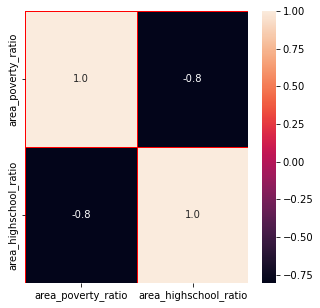

In [12]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

Yukarıdaki kod bloğunu açıklayalım. x ekseni uzunluğu 5 ve y ekseni uzunluğu 5 olan bir figür oluşturdum. 

sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax) satırı: ilk parametre ile korelasyon tablosunu belirttik. 2.parametre tablo içerisindeki hücrelerin üzerinde yazan sayıların görünmesini sağlar. 3.parametre hücreler arasındaki kırmızı çizginin kalınlığını ifade eder. 4.parametre hücreler arasındaki kırmızı çizgiye, kırmızı rengini vermemizi sağlar. 5.parametre virgülden sonra kaç hanenin olaacğını ifade eder.